In [3]:
#pip install pyhomogeneity

In [4]:
#pip install outliers 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import seaborn as sns
#from fitter import Fitter, get_common_distributions, get_distributions
import matplotlib.pyplot as plt
import pyhomogeneity as hg
#from sklearn.datasets import load_boston
import seaborn as sns
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
from scipy.stats import shapiro
from numpy.random import randn
import scipy.stats as stats
#from outliers import smirnov_grubbs as grubbs
from __future__ import division
import scipy.stats
from datetime import datetime, timedelta
import matplotlib, random
#import plotly.figure_factory as ff
import re


In [2]:
#df=pd.read_csv("station_db.csv")
# New data with outlier removed
df=pd.read_csv("df_outlier_remove.csv")

/tmp/ipykernel_323/1194264795.py:3: DtypeWarning: Columns (7,9,11,13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("df_outlier_remove.csv")


In [4]:
df['date'] = pd.to_datetime(df['date'])

In [7]:
#df1=df[(df["name"]=="KisumuAirport") | (df["name"]=="Kisii") | (df["name"]=="BungomaWS") | (df["name"]=="Migori")|  (df["name"]=="TinderetTea")]
#df1['date'] = pd.to_datetime(df1['date'])
#df1=df1.sort_values(by="date")
#df1=df1[df1["date"]<="1950-12-31"]
#df1=df1[(df1["date"]>"1950-12-31") & (df1["date"]<="1951-12-31")]
#dG=df1.groupby(pd.PeriodIndex(df1['date'], freq="M"))["prec"].mean().reset_index()

In [34]:
df1=df[df["Region"]=="South Region"]

In [24]:

dG=df1.groupby(pd.PeriodIndex(df1['date'], freq="M"))["prec"].mean().reset_index()

In [12]:
snht_test=hg.snht_test(dG["prec"],0.05)
pettitt_test= hg.pettitt_test(dG["prec"],0.05)
buishand_Q_test= hg.buishand_q_test(dG["prec"],0.05)

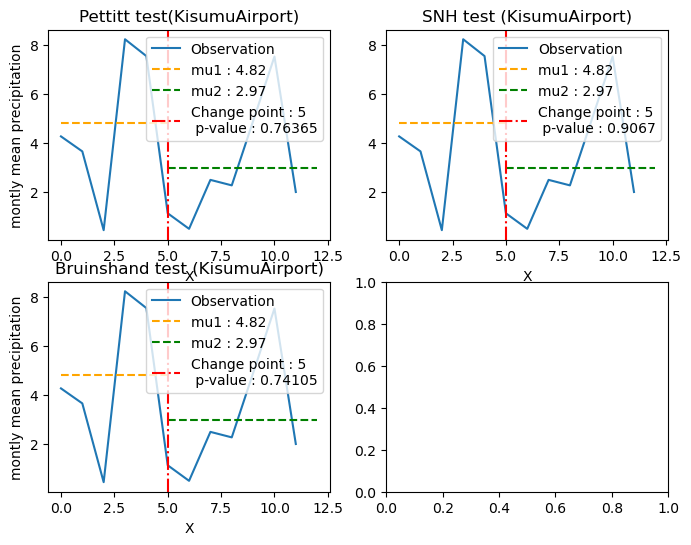

In [31]:
def homogeneity_test(var,data):
    
    lists=[pettitt_test, snht_test, buishand_Q_test]
    plt.ﬁgure(ﬁgsize=(8,6))
    plt.subplot(2,2,1)
    plt.title("Pettitt test(KisumuAirport)")
    plt.ylabel("montly mean precipitation")
    plt.subplot(2,2,2)
    plt.title("SNH test (KisumuAirport)")
    plt.subplot(2,2,3)
    plt.title("Bruinshand test (KisumuAirport)")
    plt.ylabel("montly mean precipitation")
    plt.subplot(2,2,4)
    #plt.title("BuishandLikelihood ratio test (IAR ZARIA_Nigeria)")
    for i in range(0,3):
        mn = 0
        #x=data.index
        mx = len(data)
        loc = lists[i].cp
        mu1 = lists[i].avg.mu1
        mu2 = lists[i].avg.mu2
        #my_xticks=data["date"]
        #plt.xticks(rotation=90)
        plt.subplot(2,2,i+1)
        #plt.xticks(x, my_xticks)
        plt.plot(data[var], label="Observation")
        plt.hlines(mu1, xmin=mn, xmax=loc, linestyles="--", colors='orange',lw=1.5, label='mu1 : ' + str(round(mu1,2)))
        plt.hlines(mu2, xmin=loc, xmax=mx, linestyles="--", colors='g', lw=1.5, label='mu2 : ' + str(round(mu2,2)))
        plt.axvline(x=loc, linestyle='-.' , color='red', lw=1.5, label='Change point : '+ str(loc) + '\n p-value : '+ str(lists[i].p))
        #plt.title(f": {lists[i]}")
        plt.xlabel("X")
        plt.legend(loc="upper right")
        
homogeneity_test("prec",dG)

In [32]:
dG["date"][5]

Period('1950-06', 'M')

In [25]:
dG["date"][29]

Period('1952-06', 'M')

,date,X,Y,name,prec,prec_units,wind,wind_units,srad,srad_units,tmax,tmax_units,tmin,tmin_units
633926,1950-01-01,34.58,-0.1,KisumuAirport,0.0,mm,NaN,m/s,NaN,MJ/m²/day,NaN,°C,NaN,°C
633927,1950-01-02,34.58,-0.1,KisumuAirport,0.5,mm,NaN,m/s,NaN,MJ/m²/day,NaN,°C,NaN,°C
633928,1950-01-03,34.58,-0.1,KisumuAirport,0.0,mm,NaN,m/s,NaN,MJ/m²/day,NaN,°C,NaN,°C
633929,1950-01-04,34.58,-0.1,KisumuAirport,0.0,mm,NaN,m/s,NaN,MJ/m²/day,NaN,°C,NaN,°C
633930,1950-01-05,34.58,-0.1,KisumuAirport,0.3,mm,NaN,m/s,NaN,MJ/m²/day,NaN,°C,NaN,°C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634286,1950-12-27,34.58,-0.1,KisumuAirport,0.0,mm,NaN,m/s,NaN,MJ/m²/day,NaN,°C,NaN,°C
634287,1950-12-28,34.58,-0.1,KisumuAirport,0.0,mm,NaN,m/s,NaN,MJ/m²/day,NaN,°C,NaN,°C
634288,1950-12-29,34.58,-0.1,KisumuAirport,0.0,mm,NaN,m/s,NaN,MJ/m²/day,NaN,°C,NaN,°C
634289,1950-12-30,34.58,-0.1,KisumuAirport,0.0,mm,NaN,m/s,NaN,MJ/m²/day,NaN,°C,NaN,°C


In [6]:
def SNH_stations(var,data,alpha):
    L,L1,L2,L3,L4=[],[],[],[],[]
    station_name=data["name"].unique()
    for i in range(len(station_name)):
        df=data[data["name"]==station_name[i]]
        dG=df.groupby(pd.PeriodIndex(df['date'], freq="Y"))[var].mean().reset_index()
        if len(dG)!=1:
            snht_test= hg.snht_test(dG[var],alpha)
            Pvalue=snht_test.p
            decision=snht_test.h
            year_break=snht_test.cp
            L.append(station_name[i])
            L1.append(Pvalue)
            L2.append(decision)
            L4.append(dG["date"][year_break])
        else:
            L3.append(station_name[i])
    dt=pd.DataFrame(L,columns=["Station Name"])
    dt["Pvalue"]= L1
    dt["decision"]=L2
    dt["year_break"]=L4
    return dt,L3

In [7]:
def pettitt_T_stations(var,data,alpha):
    L,L1,L2,L3,L4=[],[],[],[],[]
    station_name=data["name"].unique()
    for i in range(len(station_name)):
        df=data[data["name"]==station_name[i]]
        dG=df.groupby(pd.PeriodIndex(df['date'], freq="Y"))[var].mean().reset_index()
        if len(dG)!=1:
            pettit= hg.pettitt_test(dG[var],alpha)
            Pvalue=pettit.p
            decision=pettit.h
            year_break=pettit.cp
            L.append(station_name[i])
            L1.append(Pvalue)
            L2.append(decision)
            L4.append(dG["date"][year_break])
        else:
            L3.append(station_name[i])
    dt=pd.DataFrame(L,columns=["Station Name"])
    dt["Pvalue"]= L1
    dt["decision"]=L2
    dt["year_break"]=L4
    return dt,L3

In [8]:
def buishand_Q_T_stations(var,data,alpha):
    L,L1,L2,L3,L4=[],[],[],[],[]
    station_name=data["name"].unique()
    for i in range(len(station_name)):
        df=data[data["name"]==station_name[i]]
        dG=df.groupby(pd.PeriodIndex(df['date'], freq="Y"))[var].mean().reset_index()
        if len(dG)!=1:
            buishand_test= hg.buishand_q_test(dG[var],alpha)
            Pvalue=buishand_test.p
            decision=buishand_test.h
            year_break=buishand_test.cp
            L.append(station_name[i])
            L1.append(Pvalue)
            L2.append(decision)
            L4.append(dG["date"][year_break])
        else:
            L3.append(station_name[i])
    dt=pd.DataFrame(L,columns=["Station Name"])
    dt["Pvalue"]= L1
    dt["decision"]=L2
    dt["year_break"]=L4
    return dt,L3

In [35]:
dh=SNH_stations("prec",df1,0.05)

In [36]:
dpt=pettitt_T_stations("prec",df1,0.05)
dpt[0].rename(columns = {"Station Name":'Station Name2',"Pvalue":'Pval_P',"decision":'decisionP',"year_break":'year_breakP'}, inplace = True)

In [37]:
db=buishand_Q_T_stations("prec",df1,0.05)
db[0].rename(columns = {"Station Name":'Station Name1',"Pvalue":'Pval_b',"decision":'decisionb',"year_break":'year_breakb'}, inplace = True)

In [38]:
# combine the result in a sigle dataframe
dHomT=pd.concat([dh[0],dpt[0],db[0]],axis=1)

In [39]:
dHomT=dHomT[["Station Name","Pvalue","decision","year_break","Pval_P","decisionP","year_breakP","Pval_b","decisionb","year_breakb"]]

In [40]:
dHomT["class"]="C"

for j in range(len(dHomT)):
    count=0
    do=[dHomT["decision"][j],dHomT["decisionP"][j],dHomT["decisionb"][j]]
    dd=pd.DataFrame(do,columns=["T"])
    for i in range(len(dd)):
        if (dd["T"][i]==False):
            count=count+1
    if (count==1):
        dHomT["class"][j]="B"
    if (count==2 or count==3):
        dHomT["class"][j]="A"

/tmp/ipykernel_323/862552295.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dHomT["class"][j]="A"
/tmp/ipykernel_323/862552295.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dHomT["class"][j]="B"


In [41]:
dHomT.head()

,Station Name,Pvalue,decision,year_break,Pval_P,decisionP,year_breakP,Pval_b,decisionb,year_breakb,class
0,Kabwe Mulungushi,0.37505,False,2020,0.33700,False,2020,0.51315,False,2020,A
1,Kalabo,0.82345,False,2016,0.49870,False,2016,0.92120,False,2016,A
2,Lusaka Int. Airport,0.90745,False,2019,0.86235,False,2017,0.84810,False,2019,A
3,Lusaka University of Zambia,0.02100,True,2020,0.50075,False,2020,0.24440,False,2020,A
4,Mwinilunga,0.97380,False,2018,0.95140,False,2018,0.91510,False,2018,A


In [42]:
dHomT.to_excel("Homogeneity_test_South_region.xlsx",index=False)

In [84]:
dHomT1.to_excel("Homogeneity_seasonal_test2.xlsx")

In [85]:
dHomT.to_excel("Homogeneity_seasonal_test1.xlsx")

In [26]:
dh

(          Station Name   Pvalue  decision year_break
 0               Bukoba  0.15935     False       2006
 1               Dodoma  0.75370     False       2010
 2               Kigoma  0.26040     False       1983
 3         Lake Manyara  0.00470      True       1983
 4                Mbeya  0.55730     False       1984
 ..                 ...      ...       ...        ...
 86  WANJOHI CHIEF CAMP  0.15505     False       1996
 87           Gikonko_1  0.59545     False       2018
 88            Ntendezi  0.48730     False       2018
 89               Ngoma  0.70805     False       2017
 90              Fogera  0.45675     False       2018
 
 [91 rows x 4 columns],
 ['NAIVASHA NANGA GERRI'])